# Libraries

In [1]:
import sys
sys.path.append('..')  # Adds the project root to the path

%load_ext autoreload
%autoreload 2

from utils.visualization import *
import configparser

# Read the configuration file
config = configparser.ConfigParser()
config.read('/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/config.ini')


# Retrieve the path for min boggle
mindboggle_path = config['DIRECTORIES']['mindboggle']

print(f"Path for mindboggle: {mindboggle_path}")

Path for mindboggle: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle


# Visualize MindBoggle

In [2]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(mindboggle_path)
ground_truth_data, input_data, segmentation_data = load_files(ground_truth_path, input_path, segmentation_path)

Getting a random file from directory
Random file: NKI-RS-22-4.nii.gz
------------------------------
Ground truth path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/ground_truth/NKI-RS-22-4.nii.gz
Input path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/input/NKI-RS-22-4.nii.gz
Segmentation path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/segmentation/NKI-RS-22-4.nii.gz



Loading nifti files..
Ground Truth Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/ground_truth/NKI-RS-22-4.nii.gz):
Shape: (192, 256, 256)
------------------------------
Input Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/input/NKI-RS-22-4.nii.gz):
Shape: (192, 256, 256)
------------------------------
Segmentation Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/segmentation/NKI-RS-22-4.nii.gz):


Data Information

Ground Truth Data:
------------------------------
Data Type: float64
Number of Unique Values: 107

Input Data:
------------------------------
Data Type: float64
Number of Unique Values: 990

Segmentation Data:
------------------------------
Data Type: float64
Number of Unique Values: 5





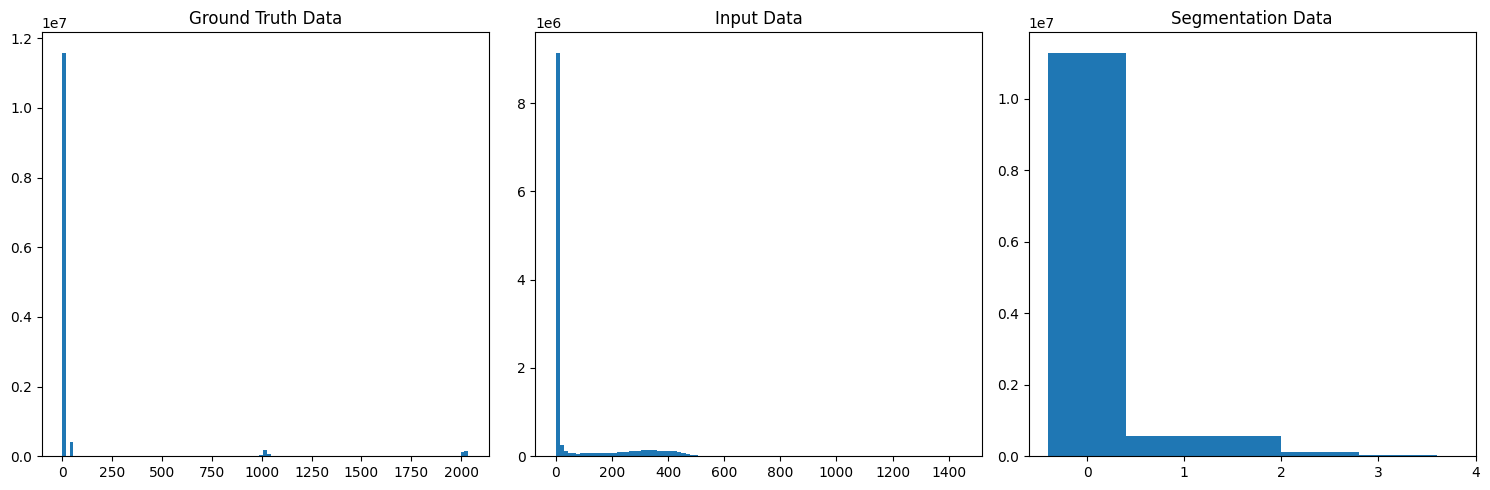

In [3]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [4]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')
    nipy_spectral_cmap = plt.get_cmap('nipy_spectral')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=nipy_spectral_cmap)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend
    colors = [nipy_spectral_cmap(i) for i in np.linspace(0, 1, 5)]
    labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in colors]
    fig.legend(lines, labels, loc='lower center', ncol=5)

    return fig

# Create an interactive slider
slice_slider = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact = interactive(plot_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider)
display(interact)

interactive(children=(IntSlider(value=0, description='slice_idx', max=255), Output()), _dom_classes=('widget-i…